In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime


In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

def scrape_bbc_headlines():
    # Path to your ChromeDriver
    driver_path = r"C:\Users\ojaga\Desktop\chromedriver-win64\chromedriver.exe"  # Update this path

    # Set up Selenium WebDriver
    service = Service(driver_path)
    driver = webdriver.Chrome(service=service)
    
    try:
        # Open the BBC News website
        driver.get("https://www.bbc.com/news")
        
        # Wait for elements containing headlines to load
        WebDriverWait(driver, 20).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "h3"))
        )
        
        # Get the page source
        page_source = driver.page_source
    finally:
        driver.quit()

    # Parse the loaded content with BeautifulSoup
    soup = BeautifulSoup(page_source, "html.parser")
    
    # Extract headlines
    headlines = []
    for item in soup.find_all("h3"):
        headline_text = item.get_text(strip=True)
        if headline_text:  # Ensure only non-empty headlines are added
            headlines.append({
                "Source": "BBC",
                "Headline": headline_text,
                "Scraped At": datetime.now()
            })
    
    # Return a DataFrame
    return pd.DataFrame(headlines)

# Run the scraper
bbc_headlines = scrape_bbc_headlines()

# Display and save the headlines
print(bbc_headlines.head())
bbc_headlines.to_csv("bbc_news_headlines.csv", index=False)
print("Headlines saved to 'bbc_news_headlines.csv'.")


  Source                                           Headline  \
0    BBC  Trump wants neighbours to take in Palestinians...   
1    BBC  Live.Trump orders 25% tariffs on Colombia afte...   
2    BBC  Survivors return as world remembers Auschwitz ...   
3    BBC  UK hit with high winds as Storm Herminia rolls in   
4    BBC  Starmer praises Trump's role in Gaza ceasefire...   

                  Scraped At  
0 2025-01-26 21:21:49.119950  
1 2025-01-26 21:21:49.119950  
2 2025-01-26 21:21:49.119950  
3 2025-01-26 21:21:49.119950  
4 2025-01-26 21:21:49.119950  
Headlines saved to 'bbc_news_headlines.csv'.


In [27]:
import pandas as pd

# Load the CSV file
file_path = "bbc_news_headlines.csv"  # Update with the correct path if needed
bbc_data = pd.read_csv(file_path)

# Remove duplicates based on the 'Headline' column
bbc_data_cleaned = bbc_data.drop_duplicates(subset="Headline", keep="first")

# Strip whitespace and standardise casing in the 'Headline' column
bbc_data_cleaned["Headline"] = bbc_data_cleaned["Headline"].str.strip()

# Display cleaned data
print("Cleaned Data:")
print(bbc_data_cleaned.head())

# Save the cleaned data to a new CSV file
bbc_data_cleaned.to_csv("bbc_news_headlines_cleaned.csv", index=False)
print("Cleaned data saved to 'bbc_news_headlines_cleaned.csv'.")


Cleaned Data:
  Source                                           Headline  \
0    BBC  Trump wants neighbours to take in Palestinians...   
1    BBC  Live.Trump orders 25% tariffs on Colombia afte...   
2    BBC  Survivors return as world remembers Auschwitz ...   
3    BBC  UK hit with high winds as Storm Herminia rolls in   
4    BBC  Starmer praises Trump's role in Gaza ceasefire...   

                   Scraped At  
0  2025-01-26 21:21:49.119950  
1  2025-01-26 21:21:49.119950  
2  2025-01-26 21:21:49.119950  
3  2025-01-26 21:21:49.119950  
4  2025-01-26 21:21:49.119950  
Cleaned data saved to 'bbc_news_headlines_cleaned.csv'.


C:\Users\ojaga\AppData\Local\Temp\ipykernel_17588\2127904871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data_cleaned["Headline"] = bbc_data_cleaned["Headline"].str.strip()


Most Common Words:
[('to', 11), ('after', 10), ('on', 8), ('a', 8), ('-', 6), ('of', 6), ('for', 5), ('the', 5), ('The', 5), ('Man', 5)]


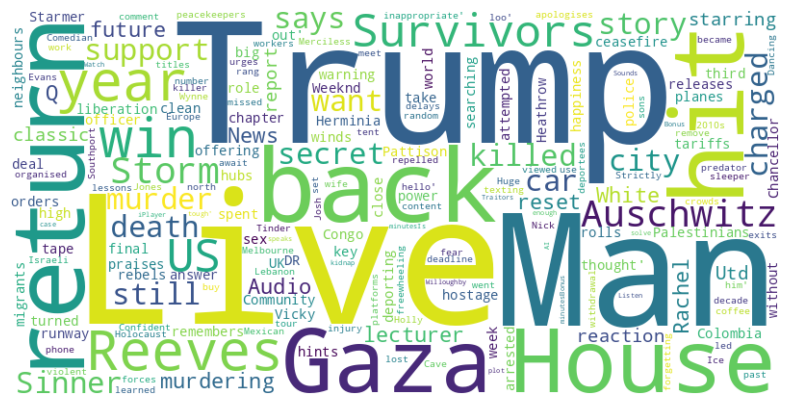

In [33]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all headlines into a single string
all_headlines = " ".join(bbc_data_cleaned["Headline"])

# Tokenise the words
words = all_headlines.split()

# Count word frequencies
word_counts = Counter(words)

# Display the most common words
print("Most Common Words:")
print(word_counts.most_common(10))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_headlines)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words (Excluding Stopwords):
[('-', 6), ('Man', 5), ('Trump', 4), ('Gaza', 3), ('hit', 3), ('Reeves', 3), ('&', 3), ('US', 2), ('back', 2), ('return', 2)]


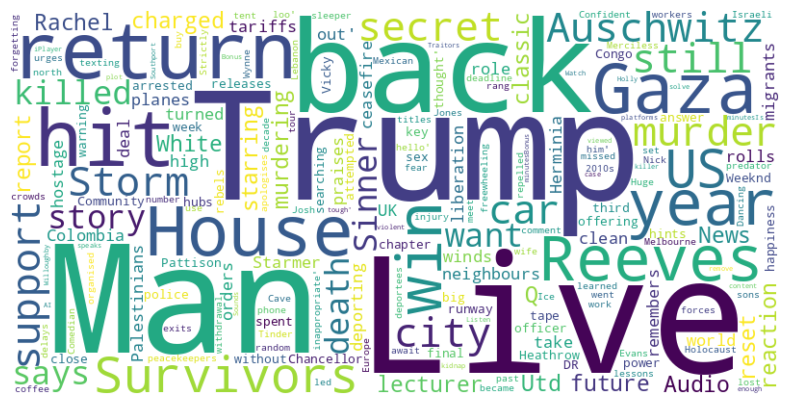

In [37]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Combine all headlines into a single string
all_headlines = " ".join(bbc_data_cleaned["Headline"])

# Tokenise the words
words = all_headlines.split()

# Remove stopwords and count word frequencies
filtered_words = [word for word in words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)

# Display the most common meaningful words
print("Most Common Words (Excluding Stopwords):")
print(word_counts.most_common(10))

# Generate a word cloud without stopwords
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

# Display the refined word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [39]:
# Define categories with keywords
categories = {
    "Politics": ["government", "election", "minister", "policy", "Trump", "Gaza", "ceasefire"],
    "Crime": ["murder", "arrested", "charged", "police", "killed"],
    "Entertainment": ["Reeves", "film", "chapter", "starring", "celebrity"],
    "Sports": ["football", "win", "tournament", "match", "team"],
    "History": ["Auschwitz", "liberation", "Survivors"],
}

# Function to categorise a headline
def categorise_headline(headline):
    for category, keywords in categories.items():
        if any(keyword.lower() in headline.lower() for keyword in keywords):
            return category
    return "Other"  # Default category for unmatched headlines

# Apply categorisation to the dataset
bbc_data_cleaned["Category"] = bbc_data_cleaned["Headline"].apply(categorise_headline)

# Save the categorised data
bbc_data_cleaned.to_csv("bbc_news_categorised.csv", index=False)

# Display a sample of categorised data
print("Sample Categorised Data:")
print(bbc_data_cleaned[["Headline", "Category"]].head())


Sample Categorised Data:
                                            Headline  Category
0  Trump wants neighbours to take in Palestinians...  Politics
1  Live.Trump orders 25% tariffs on Colombia afte...  Politics
2  Survivors return as world remembers Auschwitz ...   History
3  UK hit with high winds as Storm Herminia rolls in    Sports
4  Starmer praises Trump's role in Gaza ceasefire...  Politics


C:\Users\ojaga\AppData\Local\Temp\ipykernel_17588\2567385443.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data_cleaned["Category"] = bbc_data_cleaned["Headline"].apply(categorise_headline)


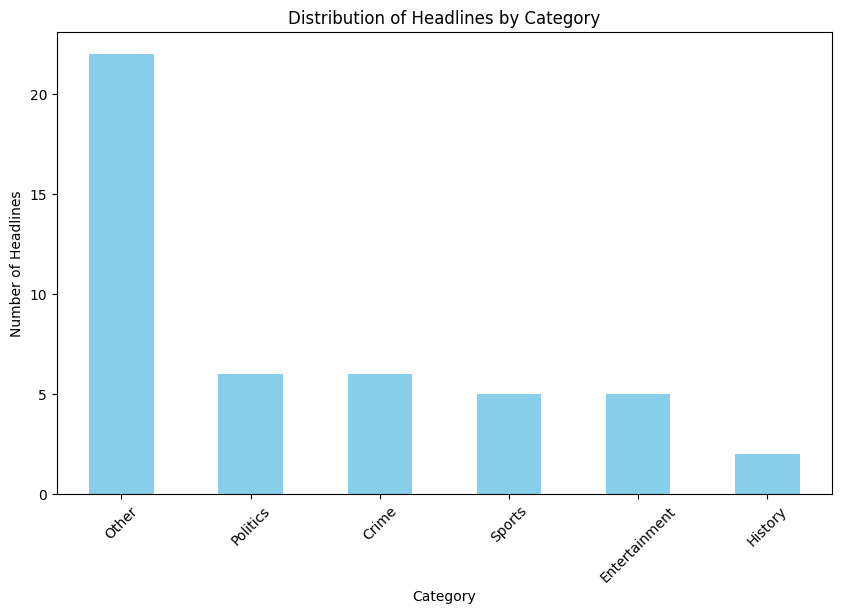

In [40]:
import matplotlib.pyplot as plt

# Count the number of headlines in each category
category_counts = bbc_data_cleaned["Category"].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Headlines by Category")
plt.xlabel("Category")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=45)
plt.show()


Headline Counts by Category:
Category
Other            22
Politics          6
Crime             6
Sports            5
Entertainment     5
History           2
Name: count, dtype: int64


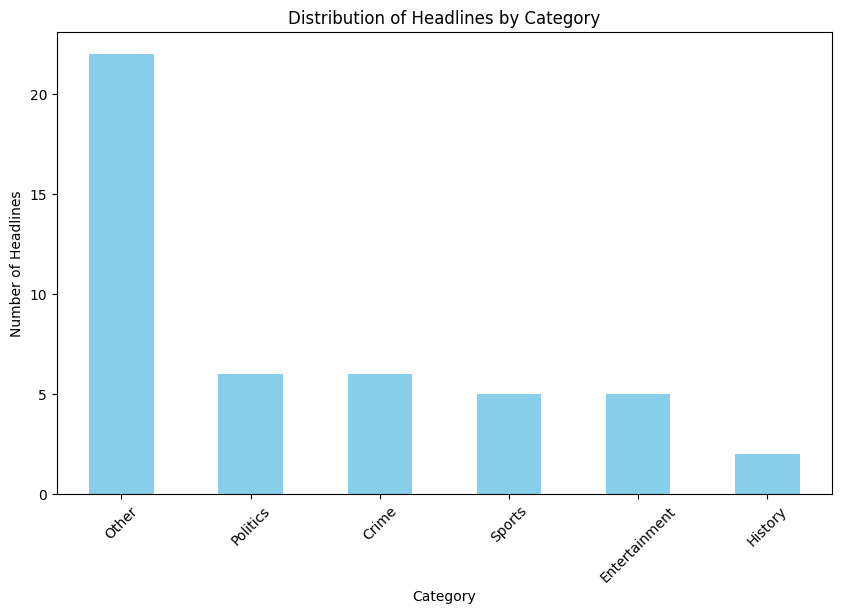

In [41]:
import matplotlib.pyplot as plt

# Count the number of headlines in each category
category_counts = bbc_data_cleaned["Category"].value_counts()

# Print the counts for reference
print("Headline Counts by Category:")
print(category_counts)

# Plot the distribution of categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Headlines by Category")
plt.xlabel("Category")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=45)
plt.show()


In [42]:
# Display sample headlines for each category
for category in bbc_data_cleaned["Category"].unique():
    print(f"Category: {category}")
    print(bbc_data_cleaned[bbc_data_cleaned["Category"] == category]["Headline"].head(5))
    print("-" * 50)


Category: Politics
0     Trump wants neighbours to take in Palestinians...
1     Live.Trump orders 25% tariffs on Colombia afte...
4     Starmer praises Trump's role in Gaza ceasefire...
62    Confident, organised, still freewheeling: Trum...
68    Huge crowds await return to north Gaza after d...
Name: Headline, dtype: object
--------------------------------------------------
Category: History
2     Survivors return as world remembers Auschwitz ...
64    Holocaust survivors fear Europe is forgetting ...
Name: Headline, dtype: object
--------------------------------------------------
Category: Sports
3     UK hit with high winds as Storm Herminia rolls in
12    Merciless Sinner wins back-to-back Melbourne t...
81    A GP under suspicion following an unexpected d...
87    Live.Premier League: Martinez's deflected stri...
88    Live.WSL: Man Utd go second with dominant win ...
Name: Headline, dtype: object
--------------------------------------------------
Category: Other
5     Community

In [43]:
categories = {
    "Politics": ["government", "election", "minister", "policy", "Trump", "Gaza", "ceasefire", "tariffs"],
    "Crime": ["murder", "arrested", "charged", "police", "killed", "attack"],
    "Entertainment": ["Reeves", "film", "chapter", "starring", "celebrity", "show", "release"],
    "Sports": ["football", "win", "tournament", "match", "team", "storm"],
    "History": ["Auschwitz", "liberation", "Survivors", "return"],
}


In [44]:
bbc_data_cleaned["Category"] = bbc_data_cleaned["Headline"].apply(categorise_headline)


C:\Users\ojaga\AppData\Local\Temp\ipykernel_17588\1763589951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data_cleaned["Category"] = bbc_data_cleaned["Headline"].apply(categorise_headline)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess headlines using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)  # Limit to 1000 most important terms
X = vectorizer.fit_transform(bbc_data_cleaned["Headline"])

# Display the TF-IDF feature names (optional)
print("TF-IDF Features:", vectorizer.get_feature_names_out()[:10])  # Show first 10 terms


TF-IDF Features: ['000' '13' '2010s' '22' '25' '30' '32' '48' '74' '80']


In [46]:
from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 5  # You can adjust this number based on your data

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
bbc_data_cleaned["Cluster"] = kmeans.fit_predict(X)

# Display cluster assignments
print("Cluster Assignments:")
print(bbc_data_cleaned[["Headline", "Cluster"]].head())


Cluster Assignments:
                                            Headline  Cluster
0  Trump wants neighbours to take in Palestinians...        4
1  Live.Trump orders 25% tariffs on Colombia afte...        3
2  Survivors return as world remembers Auschwitz ...        2
3  UK hit with high winds as Storm Herminia rolls in        2
4  Starmer praises Trump's role in Gaza ceasefire...        4


C:\Users\ojaga\AppData\Local\Temp\ipykernel_17588\434394008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data_cleaned["Cluster"] = kmeans.fit_predict(X)


In [47]:
# Extract the top terms for each cluster
def get_top_terms(cluster_centers, feature_names, n_terms=10):
    terms = []
    for cluster_idx, cluster_center in enumerate(cluster_centers):
        top_feature_indices = cluster_center.argsort()[-n_terms:][::-1]
        terms.append([feature_names[i] for i in top_feature_indices])
    return terms

# Get top terms in each cluster
top_terms = get_top_terms(kmeans.cluster_centers_, vectorizer.get_feature_names_out())
for cluster_idx, terms in enumerate(top_terms):
    print(f"Cluster {cluster_idx}: {', '.join(terms)}")


Cluster 0: death, says, following, suspicion, unexpected, gp, repelled, cave, sons, nick
Cluster 1: man, murdering, lecturer, charged, win, utd, reaction, report, university, live
Cluster 2: traitors, sinner, reeves, starring, support, secret, storm, survivors, auschwitz, city
Cluster 3: live, news, regional, iplayer, watch, listen, sounds, phone, predator, tinder
Cluster 4: trump, gaza, returns, white, clean, wants, neighbours, palestinians, house, freewheeling


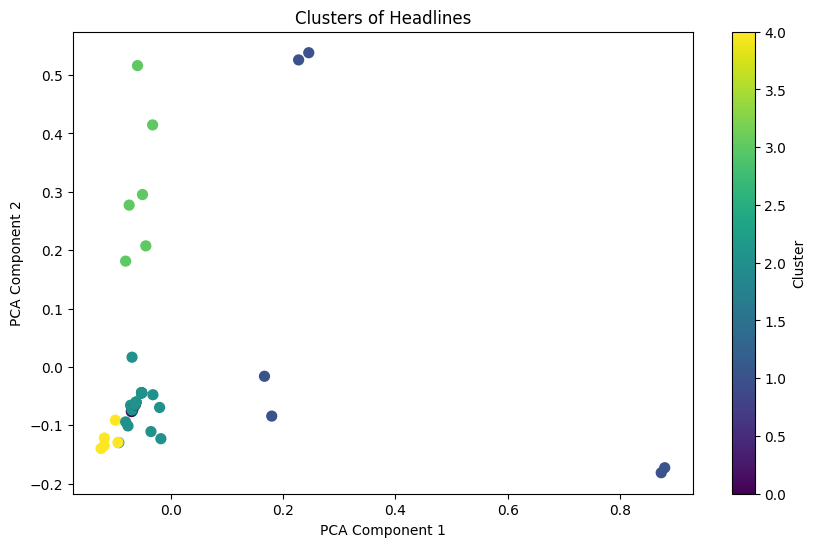

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualisation
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=bbc_data_cleaned["Cluster"], cmap="viridis", s=50)
plt.title("Clusters of Headlines")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [49]:
# Display sample headlines from each cluster
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id} Headlines:")
    print(bbc_data_cleaned[bbc_data_cleaned["Cluster"] == cluster_id]["Headline"].head(5))
    print("-" * 50)


Cluster 0 Headlines:
65    Nick Cave says work repelled him after death o...
71    Lebanon says 22 killed by Israeli forces after...
81    A GP under suspicion following an unexpected d...
Name: Headline, dtype: object
--------------------------------------------------
Cluster 1 Headlines:
9     Man arrested for attempted murder after police...
69                  Man charged with murdering lecturer
70    How texting a random number 'hello' led a man ...
87    Live.Premier League: Martinez's deflected stri...
88    Live.WSL: Man Utd go second with dominant win ...
Name: Headline, dtype: object
--------------------------------------------------
Cluster 2 Headlines:
2    Survivors return as world remembers Auschwitz ...
3    UK hit with high winds as Storm Herminia rolls in
5    Community hubs offering support as 74,000 stil...
6    'I spent 30 years searching for secret to happ...
7    Vicky Pattison's sex tape warning and The Week...
Name: Headline, dtype: object
----------------------

C:\Users\ojaga\AppData\Local\Temp\ipykernel_17588\2136945452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbc_data_cleaned["Cluster"] = kmeans.fit_predict(X)


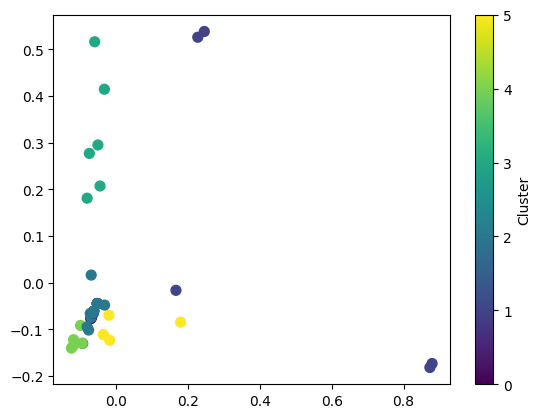

In [50]:
# Change the number of clusters
n_clusters = 6  # Increase or decrease based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
bbc_data_cleaned["Cluster"] = kmeans.fit_predict(X)

# Re-visualise with the updated clusters
X_reduced = PCA(n_components=2).fit_transform(X.toarray())
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=bbc_data_cleaned["Cluster"], cmap="viridis", s=50)
plt.colorbar(label="Cluster")
plt.show()


In [51]:
# Print top terms for each cluster again
top_terms = get_top_terms(kmeans.cluster_centers_, vectorizer.get_feature_names_out())
for cluster_idx, terms in enumerate(top_terms):
    print(f"Cluster {cluster_idx}: {', '.join(terms)}")


Cluster 0: death, says, following, suspicion, unexpected, gp, repelled, cave, sons, nick
Cluster 1: man, murdering, charged, lecturer, report, win, reaction, utd, university, live
Cluster 2: traitors, sinner, reeves, support, starring, secret, auschwitz, survivors, city, years
Cluster 3: live, news, regional, iplayer, watch, listen, sounds, phone, predator, tinder
Cluster 4: trump, gaza, returns, white, clean, wants, neighbours, palestinians, house, freewheeling
Cluster 5: hit, murder, storm, car, case, solve, ai, high, herminia, winds


In [52]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=1000)


In [53]:
# Display sample headlines for each cluster
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id} Sample Headlines:")
    print(bbc_data_cleaned[bbc_data_cleaned["Cluster"] == cluster_id]["Headline"].head(5))
    print("-" * 50)


Cluster 0 Sample Headlines:
65    Nick Cave says work repelled him after death o...
71    Lebanon says 22 killed by Israeli forces after...
81    A GP under suspicion following an unexpected d...
Name: Headline, dtype: object
--------------------------------------------------
Cluster 1 Sample Headlines:
69                  Man charged with murdering lecturer
70    How texting a random number 'hello' led a man ...
87    Live.Premier League: Martinez's deflected stri...
88    Live.WSL: Man Utd go second with dominant win ...
92       Man charged with murdering university lecturer
Name: Headline, dtype: object
--------------------------------------------------
Cluster 2 Sample Headlines:
2    Survivors return as world remembers Auschwitz ...
5    Community hubs offering support as 74,000 stil...
6    'I spent 30 years searching for secret to happ...
7    Vicky Pattison's sex tape warning and The Week...
8    Chancellor hints at support for third runway a...
Name: Headline, dtype: object
-

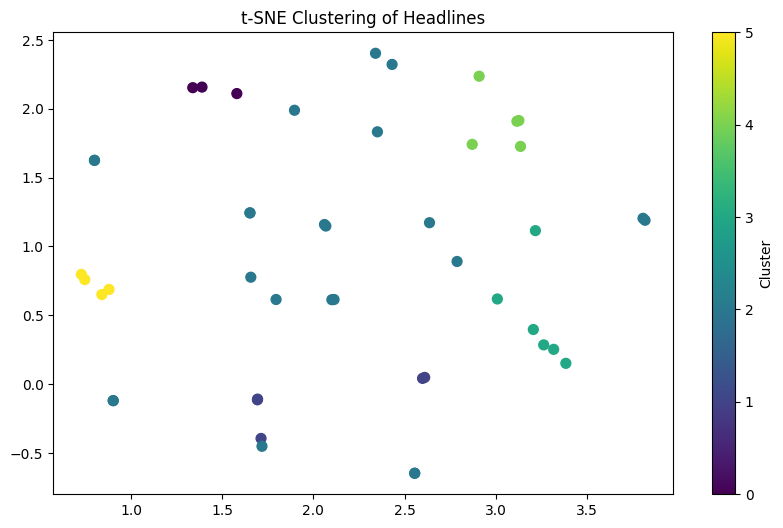

In [54]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=bbc_data_cleaned["Cluster"], cmap="viridis", s=50)
plt.colorbar(label="Cluster")
plt.title("t-SNE Clustering of Headlines")
plt.show()
